# Asset Pricing Analysis
## Comparison with Florackis et al., double sorts

In [1]:
%load_ext autoreload
%autoreload 2

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

In [3]:
#import functions from functions.py
from function_definitions import *

## Comparison with the measure of Florackis

In [73]:
#read in the previously saved stocknames file
stocknames = pd.read_csv("../data/stocknames.csv.gz", na_filter = False)
stocknames.replace('', np.nan, inplace = True)
stocknames.FF_Industry_code = stocknames.FF_Industry_code.astype(float)
#use the measure from Florackis et al
florackis_cybersec = pd.read_stata('../data/cyber_risk_measures/Florackis_original/flmw_rfs.dta')
florackis_cybersec.gvkey = florackis_cybersec.gvkey.astype('int').astype('str')
florackis_cybersec = florackis_cybersec.merge(stocknames[['gvkey','ticker']], left_on = 'gvkey', right_on = 'gvkey')
florackis_cybersec = florackis_cybersec.pivot(index = 'fyear', columns = 'ticker', values = 'cyber_risk_score_cosine')
#read in the general cybersecurity measure
cyber_measures_path = '../data/cyber_risk_measures/doc2vec/'
general_cybersec = pd.read_csv(cyber_measures_path+'general_cybersec_scores.csv.gz', index_col = 0)

In [229]:
florackis_cybersec.ZUMZ

fyear
2007.0    0.329972
2008.0    0.344065
2009.0    0.336277
2010.0    0.423016
2011.0    0.231583
2012.0    0.341218
2013.0    0.375628
2014.0    0.412892
2015.0    0.473469
2016.0    0.434830
2017.0    0.502574
2018.0         NaN
Name: ZUMZ, dtype: float64

In [74]:
#limit to common firms
cols = list(reduce(set.intersection, (set(general_cybersec.columns), set(florackis_cybersec.columns))))
general_cybersec = general_cybersec.loc[general_cybersec.index.isin(florackis_cybersec.index),cols]
florackis_cybersec = florackis_cybersec.loc[:,cols]

In [75]:
corr = pd.concat([general_cybersec.stack(),florackis_cybersec.stack()], axis = 1).corr().iloc[0,1]
print(f'The correlation of my measure with the one from Florackis et al is {round(corr,2)}')

The correlation of my measure with the one from Florackis et al is 0.34


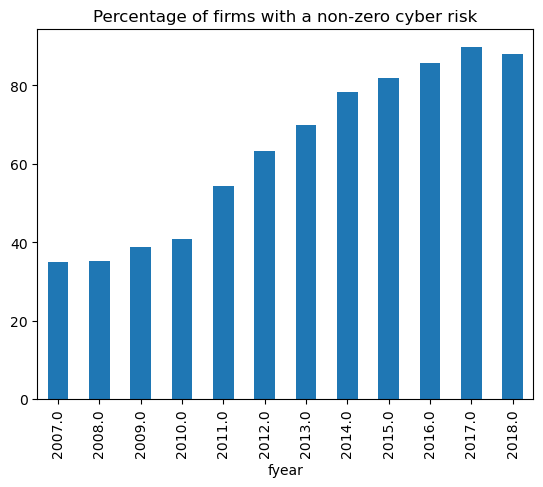

In [76]:
#percentage of firms with a non-zero cyber risk
(100-(florackis_cybersec == 0).sum(1)/(~florackis_cybersec.isna()).sum(1)*100).plot.bar()
plt.title('Percentage of firms with a non-zero cyber risk')
plt.show()

### Cyber risk of cybersecurity firms

In [77]:
#read in the holdings of the HACK ETF
HACK_holdings = pd.read_csv('../data/HACK_fund_holdings.csv')
#identify firms that are in my sample
cyber_firms = HACK_holdings.loc[HACK_holdings.StockTicker.isin(stocknames.ticker),'StockTicker'].values

In [78]:
florackis_cybersec.loc[:,florackis_cybersec.columns.isin(cyber_firms)]
#florackis_cybersec.mean(1)
#florackis_cybersec.apply(lambda row: row.rank(pct=True).loc['PANW'], axis=1)
#florackis_cybersec.apply(lambda row: row.nlargest(5).index.tolist(), axis=1)

ticker,JNPR,FFIV,AKAM,SWI,FTNT,BAH,NTCT,LDOS,PANW,SPLK,CVLT
fyear,,,,,,,,,,,
2007.0,0.083574,NaN,0.285854,NaN,NaN,NaN,0.069285,0.428185,NaN,NaN,0.000000
2008.0,0.056374,0.000000,0.320694,NaN,NaN,NaN,0.188981,0.931028,NaN,NaN,0.327418
2009.0,0.047952,0.000000,0.395145,0.369698,0.368147,NaN,0.062273,0.361579,NaN,NaN,0.400297
2010.0,0.038387,0.000000,0.405886,0.414953,0.253252,0.353211,0.076093,0.432830,NaN,NaN,0.512340
2011.0,0.422120,0.000000,0.360830,0.262245,0.330450,0.337697,0.338600,0.442443,NaN,NaN,0.386082
2012.0,0.368117,0.240543,0.582104,0.362083,0.332915,0.441949,0.400281,0.488035,0.350717,0.575011,0.443007
2013.0,0.421985,0.342721,0.546762,0.490609,0.388241,0.458730,0.433286,0.479577,0.411071,0.551137,0.475990
2014.0,0.468597,0.281369,0.502708,0.510111,0.373260,0.445979,0.405684,0.519922,0.416626,0.581246,0.500592
2015.0,0.508686,0.318062,0.566785,NaN,0.396779,0.526610,0.520120,NaN,0.436583,0.572456,0.542354


In [79]:
general_cybersec.loc[:,general_cybersec.columns.isin(cyber_firms)]

,JNPR,FFIV,AKAM,SWI,FTNT,BAH,NTCT,LDOS,PANW,SPLK,CVLT
2008,0.564826,0.613288,0.578770,NaN,NaN,NaN,0.574458,0.514070,NaN,NaN,0.579920
2009,0.568755,0.605548,0.586887,NaN,NaN,NaN,0.578210,0.521633,NaN,NaN,0.577293
2010,0.566827,0.604628,0.583342,NaN,0.617646,NaN,0.568676,0.519906,NaN,NaN,0.583375
2011,0.563001,0.610439,0.588564,NaN,0.618578,0.513806,0.576890,0.523241,NaN,NaN,0.596796
2012,0.576803,0.611129,0.579279,NaN,0.608961,0.524804,0.578880,0.546783,0.602201,NaN,0.596205
2013,0.577196,0.594851,0.594832,NaN,0.611199,0.550617,0.584130,0.557954,0.607210,0.609208,0.598630
2014,0.581199,0.605492,0.578410,NaN,0.611140,0.550541,0.576216,0.564409,0.620241,0.623508,0.602789
2015,0.575040,0.619180,0.577020,NaN,0.612143,0.553471,0.571220,0.545785,0.623814,0.636564,0.602217
2016,0.580484,0.607262,0.589195,NaN,0.616344,0.540691,0.582036,NaN,0.626958,0.611456,0.610913
2017,0.577847,0.611752,0.614236,NaN,0.632475,0.551766,0.572112,0.549387,0.623457,0.615565,0.610379


### Interesting discrepancies where firms have zero risk:
* __STX__, 2008 (p. 32):  System Failures—System failures caused by events beyond our control could adversely affect computer equipment and electronic data on which our operations depend.
    * Our operations are dependent upon our ability to protect our computer equipment and the electronic data stored in our databases from damage by, among other things, earthquake, fire, natural disaster, power loss, telecommunications failures, unauthorized intrusion and other catastrophic events. As our operations become more automated and increasingly interdependent, our exposure to the risks posed by these types of events will increase. While we continue to improve our disaster recovery processes, system failures and other interruptions in our operations could have a material adverse effect on our business, results of operations and financial condition. 
    
    
* __MANH__, 2014 (p. 20): Our software may contain undetected errors or “bugs” resulting in harm to our reputation which could adversely impact our business, results of operations, cash flow, and financial condition.
    * Software products as complex as those offered by us might contain undetected errors or failures when first introduced or when new versions are released,. Despite testing, we cannot ensure that errors will not be found in new products or product enhancements after commercial release,. Any errors could cause substantial harm to our reputation, result in additional unplanned expenses to remedy any defects, delay the introduction of new products, result in the loss of existing or potential customers, or cause a loss in revenue. Further, such errors could subject us to claims from our customers for significant damages, and we cannot assure you that courts would enforce the provisions in our customer agreements that limit our liability for damages. In turn, our business, results of operations, cash flow, and financial condition could be materially adversely affected. 
    

* __MBCN__, 2017 (p.22): Material breaches in security of bank systems may have a significant effect on the Company business.
    * We collect, process and store sensitive consumer data by utilizing computer systems and telecommunications networks operated by both banks and third party service providers. We have security, backup and recovery systems in place, as well as a business continuity plan to ensure systems will not be inoperable. We also have security to prevent unauthorized access to the system. In addition, we require third party service providers to maintain similar controls. However, we cannot be certain that these measures will be successful. A security breach in the system and loss of confidential information could result in losing customers’ confidence and thus the loss of their business as well as additional significant costs for privacy monitoring activities.

In [126]:
florackis_cybersec[['STX','MANH','MBCN']]

ticker,STX,MANH,MBCN
fyear,,,
2007.0,NaN,0.000000,NaN
2008.0,0.000000,0.000000,NaN
2009.0,0.000000,0.000000,NaN
2010.0,0.000000,0.000000,NaN
2011.0,0.000000,0.257652,NaN
2012.0,0.396673,0.256148,NaN
2013.0,0.543426,0.325037,NaN
2014.0,0.508454,0.000000,0.0
2015.0,0.536000,0.000000,0.0


In [127]:
general_cybersec[['STX','MANH','MBCN']]

,STX,MANH,MBCN
2008,0.546983,0.541096,0.503235
2009,0.555139,0.532746,0.482456
2010,0.556882,0.551043,0.533970
2011,0.576379,0.553211,0.533970
2012,0.566522,0.576169,0.513959
2013,0.562834,0.571742,0.536652
2014,0.570125,0.562404,0.534739
2015,0.572748,0.576395,0.551849
2016,0.576664,0.576395,0.551849
2017,0.588148,0.564271,0.577073


### Univariate portfolio sorts

In [248]:
#read in the necessary files (firm characteristics)
read_path = '../data/returns/'

returns = pd.read_csv(read_path+'monthly_returns.csv.gz', index_col = 'date')
mkt_caps = pd.read_csv(read_path+'monthly_mkt_caps.csv.gz', index_col = 'date')
#read in the previously saved stocknames file
stocknames = pd.read_csv("../data/stocknames.csv.gz", na_filter = False)
stocknames.replace('', np.nan, inplace = True)
stocknames.FF_Industry_code = stocknames.FF_Industry_code.astype(float)
#read in the general cybersecurity measure
cyber_measures_path = '../data/cyber_risk_measures/doc2vec/'
general_cybersec = pd.read_csv(cyber_measures_path+'general_cybersec_scores.csv.gz', index_col = 0)
long_term_cybersec = general_cybersec.expanding().mean()
long_term_cybersec[general_cybersec.isnull()] = np.nan
#use the measure from Florackis et al
florackis_cybersec = pd.read_stata('../data/cyber_risk_measures/Florackis_original/flmw_rfs.dta')
florackis_cybersec.gvkey = florackis_cybersec.gvkey.astype('int').astype('str')
florackis_cybersec = florackis_cybersec.merge(stocknames[['gvkey','ticker']], left_on = 'gvkey', right_on = 'gvkey')
florackis_cybersec = florackis_cybersec.pivot(index = 'fyear', columns = 'ticker', values = 'cyber_risk_score_cosine')

returns.index = pd.to_datetime(returns.index)
mkt_caps.index = pd.to_datetime(mkt_caps.index)

#Factor returns
FF5 = pd.read_csv('../data/FF_factors/FF5.csv',skiprows = 3, index_col = 0)[:714].astype(float)
FF5 = FF5/100 # in percent?????
FF5.index.rename('date', inplace = True)
FF5.index = pd.to_datetime(FF5.index, format = '%Y%m')
momentum = pd.read_csv('../data/FF_factors/Momentum.csv',skiprows = 13, index_col = 0)[:1153].astype(float)
momentum = momentum/100 # in percent?????
momentum.index.rename('date', inplace = True)
momentum.index = pd.to_datetime(momentum.index, format = '%Y%m')
momentum.columns = ['UMD']
FF5 = FF5.merge(momentum,left_index = True,right_index = True)

In [294]:
dates = pd.date_range(start = '01-01-2009', end = '12-01-2018', freq = 'MS', inclusive = 'left')
quarters = dates[::3]
nb_firms = []
mkt_values = []
book_to_markets = []
ROAs = []
risk_index_quintiles = []

#drop firms with less than 3 years (table 7 caption)
general_cybersec = general_cybersec.loc[:,(~general_cybersec.isnull()).sum()>3]

#list of zero-risk firms per year 
zero_risk_firms = florackis_cybersec.apply(lambda row: florackis_cybersec.columns[row == 0].tolist(), axis=1)

ew_ret = {}
vw_ret = {}
for i,month in enumerate(dates):
    #update every quarter
    if(month in quarters):
        #Cyber scores for the year
        Cybersec = general_cybersec.loc[month.year,:].dropna()
        #drop firms with no mkt cap the previous month or no ret the next 4 months
        mkt_caps_ = mkt_caps.loc[dates[i-1],Cybersec.index].dropna()
        Cybersec = Cybersec.loc[mkt_caps_.index]
        try:
            firms_with_ret = returns.loc[month:dates[i+4]].dropna(axis = 1,how = 'any').columns
        except:
            firms_with_ret = returns.loc[month:dates[i]].dropna(axis = 1,how = 'any').columns
        mkt_caps_ = mkt_caps_[mkt_caps_.index.isin(firms_with_ret)]
        Cybersec = Cybersec[Cybersec.index.isin(firms_with_ret)]
        
        #only keep firms with zero-risk using the measure of Florackis et al
        Cybersec = Cybersec[Cybersec.index.isin(zero_risk_firms[month.year])]

        #get filling dates
        fd_col = 'filling_date_{}'.format(month.year)
        fd = stocknames[[fd_col, 'ticker']].set_index('ticker')
        fd = fd.loc[Cybersec.index.values]
        fd[fd_col] = pd.to_datetime(fd[fd_col])

        #firms that have not filled yet
        idx_not_filled = fd[fd[fd_col] >= month].index
        #take the previous year's cyber score
        Cybersec.loc[idx_not_filled] = general_cybersec.loc[month.year-1,idx_not_filled]
        Cybersec.dropna(inplace = True)
        mkt_caps_ = mkt_caps_.loc[mkt_caps_.index.isin(Cybersec.index)]

        #sort firms into quintiles
        quintiles = pd.qcut(Cybersec, q = 3, labels = False)

        quantile_weights = []
        for q in range(3):
            firms = quintiles[quintiles == q].index
            quantile_weights.append(mkt_caps_.loc[firms].div(mkt_caps_.loc[firms].sum()))
            nb_firms.append(len(firms))
    
    ew_ret[month] = []
    vw_ret[month] = []
    for q in range(3):
        firms = quintiles[quintiles == q].index
        quantile_ret = returns.loc[month, firms]
        #equally weighted portfolios
        ew_ret[month].append(quantile_ret.mean())
        #value weighted portfolios
        vw_ret[month].append(quantile_ret.multiply(quantile_weights[q]).sum())
        
        #get current risk index of the portfolio
        cyber = general_cybersec.loc[month.year,firms]
        #get filling dates
        fd_col = 'filling_date_{}'.format(month.year)
        fd = stocknames[[fd_col, 'ticker']].set_index('ticker')
        fd = fd.loc[firms]
        fd[fd_col] = pd.to_datetime(fd[fd_col])
        #firms that have not filled yet
        idx_not_filled = fd[fd[fd_col] >= month].index
        #take the previous year's cyber score
        cyber.loc[idx_not_filled] = general_cybersec.loc[month.year-1,idx_not_filled]
        risk_index_quintiles.append(cyber.multiply(quantile_weights[q]).sum())

idx = ['quintile_'+str(i) for i in range(3)]
ew_ret = pd.DataFrame(ew_ret, index = idx).T
vw_ret = pd.DataFrame(vw_ret, index = idx).T
risk_index_quintiles = np.reshape(risk_index_quintiles,(-1,3))
nb_firms = np.reshape(nb_firms,(-1,3))

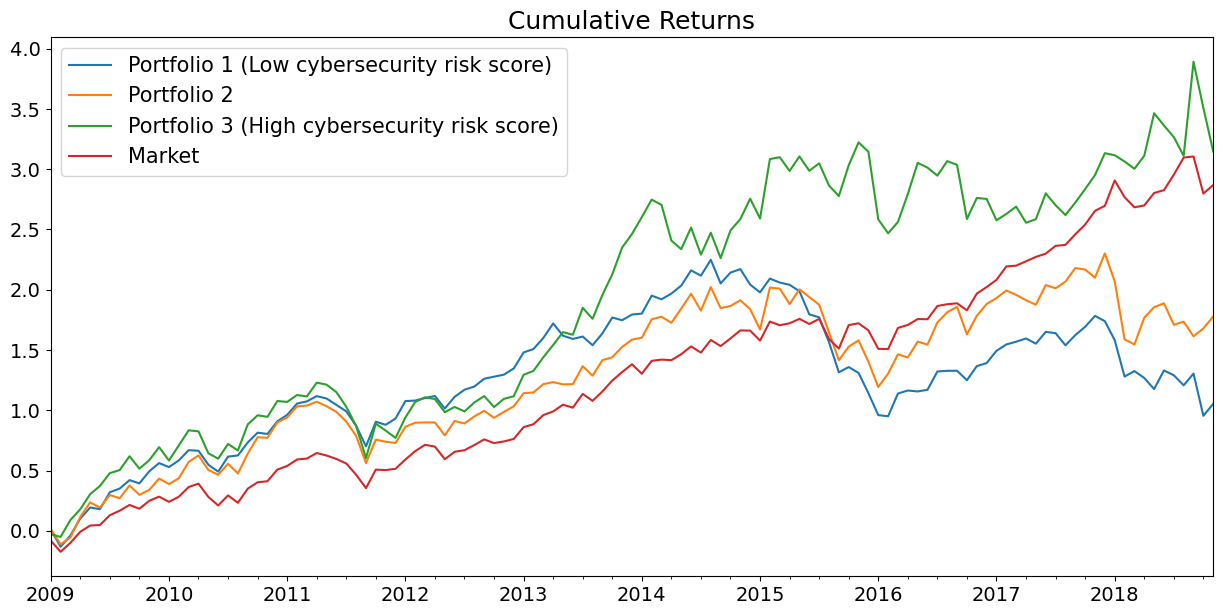

In [295]:
#plot the cumulative return of the quintile portfolios and the market portfolio
Mkt = FF5['Mkt-RF'].add(FF5['RF'])
Mkt.name = 'Mkt'
temp = pd.concat([vw_ret, Mkt[Mkt.index.isin(vw_ret.index)]], axis = 1)
((temp+1).cumprod()-1).plot(figsize = (15,7))
plt.title('Cumulative Returns', fontsize = 18)
plt.legend(['Portfolio 1 (Low cybersecurity risk score)', 'Portfolio 2',
            'Portfolio 3 (High cybersecurity risk score)',
            'Market'], fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

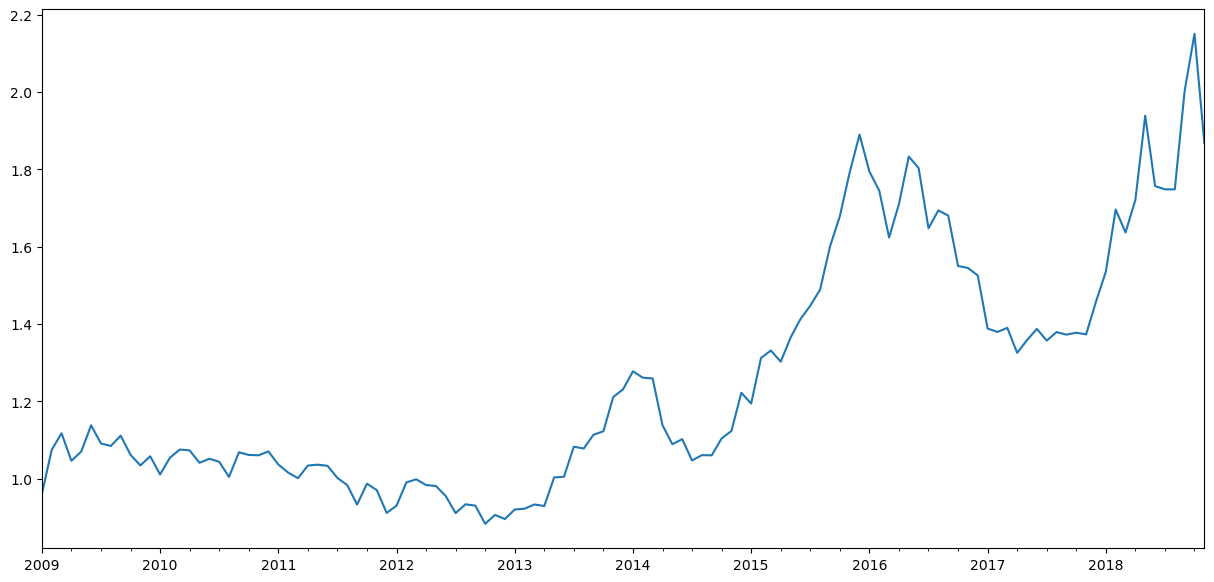

In [296]:
#plot the cumulative returns of the long-short portfolio
((vw_ret.quintile_2-vw_ret.quintile_0)+1).cumprod().plot(figsize = (15,7))
plt.show()

In [297]:
def get_alphas_(quintile_returns, FF5):
    table = pd.DataFrame(np.ones([4,4]), index = ['Excess return', 'CAPM alpha', 'FFC alpha','FF5 alpha'],
                    columns = ['Q1 (low)', 'Q2', 'Q3 (high)', 'Q3-Q1'])
    pval_table = table.copy()*np.nan
    t_stat_table = table.copy()*np.nan
    idx = quintile_returns.index
    FFC_factors = ['Mkt-RF','HML','SMB','UMD']
    FF5_factors = ['Mkt-RF','HML','SMB','RMW', 'CMA']
    
    excess_ret = []
    for q in range(3):
        #excess returns
        er = quintile_returns[f'quintile_{q}'].sub(FF5.loc[idx,'RF'],axis = 0)
        excess_ret.append(er)
        table.iloc[0,q] = er.mean()
        pval_table.iloc[0,q] = sm.OLS(er,np.ones(len(idx))).fit(cov_type='HAC',cov_kwds={'maxlags':12}).pvalues.const
        t_stat_table.iloc[0,q] = sm.OLS(er,np.ones(len(idx))).fit(cov_type='HAC',cov_kwds={'maxlags':12}).tvalues.const
        #CAPM alpha
        capm = sm.OLS(er,sm.add_constant(FF5.loc[idx, 'Mkt-RF'])).fit(cov_type='HAC',cov_kwds={'maxlags':12})
        table.iloc[1,q] = capm.params.const
        pval_table.iloc[1,q] = capm.pvalues.const
        t_stat_table.iloc[1,q] = capm.tvalues.const
        #FFC alpha
        ffc = sm.OLS(er,sm.add_constant(FF5.loc[idx, FFC_factors])).fit(cov_type='HAC',cov_kwds={'maxlags':12})
        table.iloc[2,q] = ffc.params.const
        pval_table.iloc[2,q] = ffc.pvalues.const
        t_stat_table.iloc[2,q] = ffc.tvalues.const
        #FF5 alpha
        ff5 = sm.OLS(er,sm.add_constant(FF5.loc[idx, FF5_factors])).fit(cov_type='HAC',cov_kwds={'maxlags':12})
        table.iloc[3,q] = ff5.params.const
        pval_table.iloc[3,q] = ff5.pvalues.const
        t_stat_table.iloc[3,q] = ff5.tvalues.const
    
    #long-short portfolio
    #excess returns
    ls_er = excess_ret[-1].sub(excess_ret[0].values)
    table.iloc[0,3] = ls_er.mean()
    pval_table.iloc[0,3] = sm.OLS(ls_er,np.ones(len(idx))).fit(cov_type='HAC',cov_kwds={'maxlags':12}).pvalues.const
    t_stat_table.iloc[0,3] = sm.OLS(ls_er,np.ones(len(idx))).fit(cov_type='HAC',cov_kwds={'maxlags':12}).tvalues.const
    #CAPM alpha
    capm = sm.OLS(ls_er,sm.add_constant(FF5.loc[idx, 'Mkt-RF'])).fit(cov_type='HAC',cov_kwds={'maxlags':12})
    table.iloc[1,3] = capm.params.const
    pval_table.iloc[1,3] = capm.pvalues.const
    t_stat_table.iloc[1,3] = capm.tvalues.const
    #FFC alpha
    ffc = sm.OLS(ls_er,sm.add_constant(FF5.loc[idx, FFC_factors])).fit(cov_type='HAC',cov_kwds={'maxlags':12})
    table.iloc[2,3] = ffc.params.const
    pval_table.iloc[2,3] = ffc.pvalues.const
    t_stat_table.iloc[2,3] = ffc.tvalues.const
    #FF5 alpha
    ff5 = sm.OLS(ls_er,sm.add_constant(FF5.loc[idx, FF5_factors])).fit(cov_type='HAC',cov_kwds={'maxlags':12})
    table.iloc[3,3] = ff5.params.const
    pval_table.iloc[3,3] = ff5.pvalues.const
    t_stat_table.iloc[3,3] = ff5.tvalues.const
    
    return table, pval_table, t_stat_table

In [298]:
#value weighted excess returns and alphas
table, pval_table, t_stat_table = get_alphas_(vw_ret, FF5)
print('Value weighted portfolios')
display(table.style.format("{:.2%}"))
print('p-values:')
display(pval_table.style.format("{:.3f}"))
print('t stats:')
display(t_stat_table.style.format("{:.3f}"))

Value weighted portfolios


,Q1 (low),Q2,Q3 (high),Q3-Q1
Excess return,0.71%,0.99%,1.35%,0.64%
CAPM alpha,-0.49%,-0.29%,0.03%,0.52%
FFC alpha,-0.50%,-0.25%,-0.02%,0.48%
FF5 alpha,-0.55%,-0.24%,0.16%,0.70%


p-values:


,Q1 (low),Q2,Q3 (high),Q3-Q1
Excess return,0.215,0.027,0.005,0.182
CAPM alpha,0.227,0.326,0.951,0.352
FFC alpha,0.156,0.334,0.950,0.379
FF5 alpha,0.166,0.352,0.586,0.168


t stats:


,Q1 (low),Q2,Q3 (high),Q3-Q1
Excess return,1.240,2.208,2.828,1.334
CAPM alpha,-1.207,-0.983,0.061,0.930
FFC alpha,-1.417,-0.966,-0.063,0.879
FF5 alpha,-1.384,-0.931,0.544,1.378


In [299]:
#characteristics of the portfolios
tableB = pd.DataFrame(np.ones([2,3]), index = ['Number of firms', 'Cybersecurity risk index'],
                      columns = ['Q1 (low)', 'Q2', 'Q3 (high)'])
tableB.loc['Number of firms',:] = np.mean(nb_firms, axis = 0)
tableB.loc['Cybersecurity risk index',:] = np.mean(risk_index_quintiles, axis = 0)

tableB.style.format("{:.3f}")

,Q1 (low),Q2,Q3 (high)
Number of firms,75.675,75.050,75.325
Cybersecurity risk index,0.489,0.508,0.540


## Double sorts

In [230]:
#read in the necessary files (firm characteristics)
read_path = '../data/returns/'

returns = pd.read_csv(read_path+'monthly_returns.csv.gz', index_col = 'date')
mkt_caps = pd.read_csv(read_path+'monthly_mkt_caps.csv.gz', index_col = 'date')
betas = pd.read_csv(read_path+'mkt_betas.csv.gz', index_col = 'date')
book_to_market = pd.read_csv(read_path+'book_to_market.csv.gz', index_col = 'date')
#read in the previously saved stocknames file
stocknames = pd.read_csv("../data/stocknames.csv.gz", na_filter = False)
stocknames.replace('', np.nan, inplace = True)
stocknames.FF_Industry_code = stocknames.FF_Industry_code.astype(float)
#read in the general cybersecurity measure
cyber_measures_path = '../data/cyber_risk_measures/doc2vec/'
general_cybersec = pd.read_csv(cyber_measures_path+'general_cybersec_scores.csv.gz', index_col = 0)
long_term_cybersec = general_cybersec.expanding().mean()
long_term_cybersec[general_cybersec.isnull()] = np.nan

returns.index = pd.to_datetime(returns.index)
mkt_caps.index = pd.to_datetime(mkt_caps.index)
betas.index = pd.to_datetime(betas.index)
book_to_market.index = pd.to_datetime(book_to_market.index)

#Factor returns
FF5 = pd.read_csv('../data/FF_factors/FF5.csv',skiprows = 3, index_col = 0)[:714].astype(float)
FF5 = FF5/100 # in percent?????
FF5.index.rename('date', inplace = True)
FF5.index = pd.to_datetime(FF5.index, format = '%Y%m')
momentum = pd.read_csv('../data/FF_factors/Momentum.csv',skiprows = 13, index_col = 0)[:1153].astype(float)
momentum = momentum/100 # in percent?????
momentum.index.rename('date', inplace = True)
momentum.index = pd.to_datetime(momentum.index, format = '%Y%m')
momentum.columns = ['UMD']
FF5 = FF5.merge(momentum,left_index = True,right_index = True)

### Double sorted on beta

In [246]:
dates = pd.date_range(start = '01-01-2009', end = '12-01-2022', freq = 'MS', inclusive = 'left')
quarters = dates[::3]
nb_firms = []
mkt_values = []
book_to_markets = []
ROAs = []
risk_index_quintiles = []

#drop firms with less than 3 years (table 7 caption)
general_cybersec = general_cybersec.loc[:,(~general_cybersec.isnull()).sum()>3]

ew_ret = {}
vw_ret = {}
for i,month in enumerate(dates):
    #update every quarter
    if(month in quarters):
        #Cyber scores for the year
        Cybersec = general_cybersec.loc[month.year,:].dropna()
        #drop firms with no mkt cap the previous month or no ret the next 4 months
        mkt_caps_ = mkt_caps.loc[dates[i-1],Cybersec.index].dropna()
        Cybersec = Cybersec.loc[mkt_caps_.index]
        try:
            firms_with_ret = returns.loc[month:dates[i+4]].dropna(axis = 1,how = 'any').columns
        except:
            firms_with_ret = returns.loc[month:dates[i+1]].dropna(axis = 1,how = 'any').columns
        mkt_caps_ = mkt_caps_[mkt_caps_.index.isin(firms_with_ret)]
        Cybersec = Cybersec[Cybersec.index.isin(firms_with_ret)]
        #drop firms with no betas the previous month
        betas_ = betas.loc[dates[i-1],betas.columns.isin(Cybersec.index)].dropna()
        Cybersec = Cybersec.loc[betas_.index]

        #get filling dates
        fd_col = 'filling_date_{}'.format(month.year)
        fd = stocknames[[fd_col, 'ticker']].set_index('ticker')
        fd = fd.loc[Cybersec.index.values]
        fd[fd_col] = pd.to_datetime(fd[fd_col])

        #firms that have not filled yet
        idx_not_filled = fd[fd[fd_col] >= month].index
        #take the previous year's cyber score
        Cybersec.loc[idx_not_filled] = general_cybersec.loc[month.year-1,idx_not_filled]
        Cybersec.dropna(inplace = True)
        mkt_caps_ = mkt_caps_.loc[mkt_caps_.index.isin(Cybersec.index)]
        betas_ = betas_.loc[betas_.index.isin(Cybersec.index)]

        #sort firms into quintiles along market beta
        quintiles_beta = pd.qcut(betas_, q = 5, labels = False)
        
        #sort firms into quintiles along cyber risk
        quintiles_cyber = pd.Series(dtype = 'int64').reindex_like(quintiles_beta)
        for q in range(5):
            temp = pd.qcut(Cybersec[quintiles_beta[quintiles_beta == q].index], q = 5, labels = False)
            quintiles_cyber[quintiles_cyber.index.isin(temp.index)] = temp
            
        #join the two sorts
        quintiles = pd.concat([quintiles_cyber,quintiles_beta], axis = 1, keys = ['cyber','beta'])
        quintiles['overall'] = quintiles.beta*5+quintiles.cyber

        quantile_weights = []
        for q in range(25):
            firms = quintiles[quintiles.overall == q].index
            quantile_weights.append(mkt_caps_.loc[firms].div(mkt_caps_.loc[firms].sum()))
            nb_firms.append(len(firms))
    
    ew_ret[month] = []
    vw_ret[month] = []
    for q in range(25):
        firms = quintiles[quintiles.overall == q].index
        quantile_ret = returns.loc[month, firms]
        #equally weighted portfolios
        ew_ret[month].append(quantile_ret.mean())
        #value weighted portfolios
        vw_ret[month].append(quantile_ret.multiply(quantile_weights[q]).sum())
        
        #get current risk index of the portfolio
        cyber = general_cybersec.loc[month.year,firms]
        #get filling dates
        fd_col = 'filling_date_{}'.format(month.year)
        fd = stocknames[[fd_col, 'ticker']].set_index('ticker')
        fd = fd.loc[firms]
        fd[fd_col] = pd.to_datetime(fd[fd_col])
        #firms that have not filled yet
        idx_not_filled = fd[fd[fd_col] >= month].index
        #take the previous year's cyber score
        cyber.loc[idx_not_filled] = general_cybersec.loc[month.year-1,idx_not_filled]
        risk_index_quintiles.append(cyber.multiply(quantile_weights[q]).sum())

idx = ['quintile_'+str(i) for i in range(25)]
ew_ret = pd.DataFrame(ew_ret, index = idx).T
vw_ret = pd.DataFrame(vw_ret, index = idx).T
risk_index_quintiles = np.reshape(risk_index_quintiles,(-1,25))
nb_firms = np.reshape(nb_firms,(-1,25))

In [247]:
print("Value weighted portfolios' excess returns")
table = pd.DataFrame(vw_ret.mean().values.reshape(5,5),
                     index = ['Beta Q1 (Low)', 'Beta Q2', 'Beta Q3', 'Beta Q4', 'Beta Q5 (High)'],
                     columns = ['Cyber Q1 (Low)', 'Cyber Q2', 'Cyber Q3', 'Cyber Q4', 'Cyber Q5 (High)'])
display(table.style.format("{:.2%}"))

Value weighted portfolios' excess returns


,Cyber Q1 (Low),Cyber Q2,Cyber Q3,Cyber Q4,Cyber Q5 (High)
Beta Q1 (Low),0.94%,1.01%,0.85%,1.09%,0.91%
Beta Q2,1.04%,1.03%,1.23%,1.25%,1.55%
Beta Q3,0.98%,1.22%,1.25%,1.36%,1.39%
Beta Q4,1.36%,1.19%,1.38%,1.29%,1.96%
Beta Q5 (High),1.61%,1.71%,1.79%,1.86%,1.72%


### Double sorted on book-to-market

In [221]:
dates = pd.date_range(start = '01-01-2009', end = '12-01-2022', freq = 'MS', inclusive = 'left')
quarters = dates[::3]
nb_firms = []
mkt_values = []
book_to_markets = []
ROAs = []
risk_index_quintiles = []

#drop firms with less than 3 years (table 7 caption)
general_cybersec = general_cybersec.loc[:,(~general_cybersec.isnull()).sum()>3]

ew_ret = {}
vw_ret = {}
for i,month in enumerate(dates):
    #update every quarter
    if(month in quarters):
        #Cyber scores for the year
        Cybersec = general_cybersec.loc[month.year,:].dropna()
        #drop firms with no mkt cap the previous month or no ret the next 4 months
        mkt_caps_ = mkt_caps.loc[dates[i-1],Cybersec.index].dropna()
        Cybersec = Cybersec.loc[mkt_caps_.index]
        try:
            firms_with_ret = returns.loc[month:dates[i+4]].dropna(axis = 1,how = 'any').columns
        except:
            firms_with_ret = returns.loc[month:dates[i+1]].dropna(axis = 1,how = 'any').columns
        mkt_caps_ = mkt_caps_[mkt_caps_.index.isin(firms_with_ret)]
        Cybersec = Cybersec[Cybersec.index.isin(firms_with_ret)]
        #drop firms with no betas the previous month
        book_to_market_ = book_to_market.loc[dates[i-1],book_to_market.columns.isin(Cybersec.index)].dropna()
        Cybersec = Cybersec.loc[book_to_market_.index]

        #get filling dates
        fd_col = 'filling_date_{}'.format(month.year)
        fd = stocknames[[fd_col, 'ticker']].set_index('ticker')
        fd = fd.loc[Cybersec.index.values]
        fd[fd_col] = pd.to_datetime(fd[fd_col])

        #firms that have not filled yet
        idx_not_filled = fd[fd[fd_col] >= month].index
        #take the previous year's cyber score
        Cybersec.loc[idx_not_filled] = general_cybersec.loc[month.year-1,idx_not_filled]
        Cybersec.dropna(inplace = True)
        mkt_caps_ = mkt_caps_.loc[mkt_caps_.index.isin(Cybersec.index)]
        book_to_market_ = book_to_market_.loc[book_to_market_.index.isin(Cybersec.index)]

        #sort firms into quintiles along book to market
        quintiles_BM = pd.qcut(book_to_market_, q = 5, labels = False)
        
        #sort firms into quintiles along cyber risk
        quintiles_cyber = pd.Series(dtype = 'int64').reindex_like(quintiles_BM)
        for q in range(5):
            temp = pd.qcut(Cybersec[quintiles_BM[quintiles_BM == q].index], q = 5, labels = False)
            quintiles_cyber[quintiles_cyber.index.isin(temp.index)] = temp
            
        #join the two sorts
        quintiles = pd.concat([quintiles_cyber,quintiles_BM], axis = 1, keys = ['cyber','BM'])
        quintiles['overall'] = quintiles.BM*5+quintiles.cyber

        quantile_weights = []
        for q in range(25):
            firms = quintiles[quintiles.overall == q].index
            quantile_weights.append(mkt_caps_.loc[firms].div(mkt_caps_.loc[firms].sum()))
            nb_firms.append(len(firms))
    
    ew_ret[month] = []
    vw_ret[month] = []
    for q in range(25):
        firms = quintiles[quintiles.overall == q].index
        quantile_ret = returns.loc[month, firms]
        #equally weighted portfolios
        ew_ret[month].append(quantile_ret.mean())
        #value weighted portfolios
        vw_ret[month].append(quantile_ret.multiply(quantile_weights[q]).sum())
        
        #get current risk index of the portfolio
        cyber = general_cybersec.loc[month.year,firms]
        #get filling dates
        fd_col = 'filling_date_{}'.format(month.year)
        fd = stocknames[[fd_col, 'ticker']].set_index('ticker')
        fd = fd.loc[firms]
        fd[fd_col] = pd.to_datetime(fd[fd_col])
        #firms that have not filled yet
        idx_not_filled = fd[fd[fd_col] >= month].index
        #take the previous year's cyber score
        cyber.loc[idx_not_filled] = general_cybersec.loc[month.year-1,idx_not_filled]
        risk_index_quintiles.append(cyber.multiply(quantile_weights[q]).sum())

idx = ['quintile_'+str(i) for i in range(25)]
ew_ret = pd.DataFrame(ew_ret, index = idx).T
vw_ret = pd.DataFrame(vw_ret, index = idx).T
risk_index_quintiles = np.reshape(risk_index_quintiles,(-1,25))
nb_firms = np.reshape(nb_firms,(-1,25))

In [222]:
print("Value weighted portfolios' excess returns")
table = pd.DataFrame(vw_ret.mean().values.reshape(5,5),
                     index = ['BM Q1 (Low)', 'BM Q2', 'BM Q3', 'BM Q4', 'BM Q5 (High)'],
                     columns = ['Cyber Q1 (Low)', 'Cyber Q2', 'Cyber Q3', 'Cyber Q4', 'Cyber Q5 (High)'])
display(table.style.format("{:.2%}"))

Value weighted portfolios' excess returns


,Cyber Q1 (Low),Cyber Q2,Cyber Q3,Cyber Q4,Cyber Q5 (High)
BM Q1 (Low),0.90%,1.09%,1.22%,1.28%,1.54%
BM Q2,1.02%,1.09%,1.32%,1.23%,1.36%
BM Q3,0.99%,1.04%,1.23%,1.18%,1.51%
BM Q4,1.04%,1.17%,1.29%,1.25%,1.37%
BM Q5 (High),1.87%,1.77%,1.73%,1.64%,1.71%


### Double sorted on size

In [223]:
dates = pd.date_range(start = '01-01-2009', end = '12-01-2022', freq = 'MS', inclusive = 'left')
quarters = dates[::3]
nb_firms = []
mkt_values = []
book_to_markets = []
ROAs = []
risk_index_quintiles = []

#drop firms with less than 3 years (table 7 caption)
general_cybersec = general_cybersec.loc[:,(~general_cybersec.isnull()).sum()>3]

ew_ret = {}
vw_ret = {}
for i,month in enumerate(dates):
    #update every quarter
    if(month in quarters):
        #Cyber scores for the year
        Cybersec = general_cybersec.loc[month.year,:].dropna()
        #drop firms with no mkt cap the previous month or no ret the next 4 months
        mkt_caps_ = mkt_caps.loc[dates[i-1],Cybersec.index].dropna()
        Cybersec = Cybersec.loc[mkt_caps_.index]
        try:
            firms_with_ret = returns.loc[month:dates[i+4]].dropna(axis = 1,how = 'any').columns
        except:
            firms_with_ret = returns.loc[month:dates[i+1]].dropna(axis = 1,how = 'any').columns
        mkt_caps_ = mkt_caps_[mkt_caps_.index.isin(firms_with_ret)]
        Cybersec = Cybersec[Cybersec.index.isin(firms_with_ret)]

        #get filling dates
        fd_col = 'filling_date_{}'.format(month.year)
        fd = stocknames[[fd_col, 'ticker']].set_index('ticker')
        fd = fd.loc[Cybersec.index.values]
        fd[fd_col] = pd.to_datetime(fd[fd_col])

        #firms that have not filled yet
        idx_not_filled = fd[fd[fd_col] >= month].index
        #take the previous year's cyber score
        Cybersec.loc[idx_not_filled] = general_cybersec.loc[month.year-1,idx_not_filled]
        Cybersec.dropna(inplace = True)
        mkt_caps_ = mkt_caps_.loc[mkt_caps_.index.isin(Cybersec.index)]
        
        #sort firms into quintiles along mkt cap
        quintiles_Size = pd.qcut(mkt_caps_, q = 5, labels = False)
        
        #sort firms into quintiles along cyber risk
        quintiles_cyber = pd.Series(dtype = 'int64').reindex_like(quintiles_Size)
        for q in range(5):
            temp = pd.qcut(Cybersec[quintiles_Size[quintiles_Size == q].index], q = 5, labels = False)
            quintiles_cyber[quintiles_cyber.index.isin(temp.index)] = temp
            
        #join the two sorts
        quintiles = pd.concat([quintiles_cyber,quintiles_Size], axis = 1, keys = ['cyber','Size'])
        quintiles['overall'] = quintiles.Size*5+quintiles.cyber

        quantile_weights = []
        for q in range(25):
            firms = quintiles[quintiles.overall == q].index
            quantile_weights.append(mkt_caps_.loc[firms].div(mkt_caps_.loc[firms].sum()))
            nb_firms.append(len(firms))
    
    ew_ret[month] = []
    vw_ret[month] = []
    for q in range(25):
        firms = quintiles[quintiles.overall == q].index
        quantile_ret = returns.loc[month, firms]
        #equally weighted portfolios
        ew_ret[month].append(quantile_ret.mean())
        #value weighted portfolios
        vw_ret[month].append(quantile_ret.multiply(quantile_weights[q]).sum())
        
        #get current risk index of the portfolio
        cyber = general_cybersec.loc[month.year,firms]
        #get filling dates
        fd_col = 'filling_date_{}'.format(month.year)
        fd = stocknames[[fd_col, 'ticker']].set_index('ticker')
        fd = fd.loc[firms]
        fd[fd_col] = pd.to_datetime(fd[fd_col])
        #firms that have not filled yet
        idx_not_filled = fd[fd[fd_col] >= month].index
        #take the previous year's cyber score
        cyber.loc[idx_not_filled] = general_cybersec.loc[month.year-1,idx_not_filled]
        risk_index_quintiles.append(cyber.multiply(quantile_weights[q]).sum())

idx = ['quintile_'+str(i) for i in range(25)]
ew_ret = pd.DataFrame(ew_ret, index = idx).T
vw_ret = pd.DataFrame(vw_ret, index = idx).T
risk_index_quintiles = np.reshape(risk_index_quintiles,(-1,25))
nb_firms = np.reshape(nb_firms,(-1,25))

In [224]:
print("Value weighted portfolios' excess returns")
table = pd.DataFrame(vw_ret.mean().values.reshape(5,5),
                     index = ['Size Q1 (Small)', 'Size Q2', 'Size Q3', 'Size Q4', 'Size Q5 (Large)'],
                     columns = ['Cyber Q1 (Low)', 'Cyber Q2', 'Cyber Q3', 'Cyber Q4', 'Cyber Q5 (High)'])
display(table.style.format("{:.2%}"))

Value weighted portfolios' excess returns


,Cyber Q1 (Low),Cyber Q2,Cyber Q3,Cyber Q4,Cyber Q5 (High)
Size Q1 (Small),1.33%,1.25%,1.45%,1.77%,1.24%
Size Q2,1.35%,1.54%,1.23%,1.18%,1.38%
Size Q3,1.43%,1.39%,1.19%,1.33%,1.47%
Size Q4,1.16%,1.21%,1.29%,1.24%,1.30%
Size Q5 (Large),0.86%,1.00%,1.14%,1.25%,1.52%
